In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost as xgb
import tensorflow as tf

In [2]:
df = pd.read_csv('SolAtasIMC_tratado.csv')

Imprimimos la información general de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36400 entries, 0 to 36399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    36400 non-null  object 
 1   open    36400 non-null  float64
 2   high    36400 non-null  float64
 3   low     36400 non-null  float64
 4   close   36400 non-null  float64
 5   value   36400 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
tamanio = df.shape[0]

Creamos los conjuntos de entrenamiento, validación y test

In [5]:
df_train = df.copy().loc[0:int(tamanio*0.7)]
df_train

date   open   high    low  close  value
0      2020-08-12 03:00:00   3.10   3.35   3.10   3.25     75
1      2020-08-12 04:00:00   3.25   3.25   3.15   3.15     75
2      2020-08-12 05:00:00   3.15   3.30   3.15   3.30     75
3      2020-08-12 06:00:00   3.30   3.30   3.15   3.30     75
4      2020-08-12 07:00:00   3.25   3.25   3.20   3.25     75
...                    ...    ...    ...    ...    ...    ...
25476  2023-07-11 21:00:00  22.00  22.05  21.90  22.00     57
25477  2023-07-11 22:00:00  22.00  22.10  21.90  22.00     57
25478  2023-07-11 23:00:00  22.00  22.05  21.75  21.95     57
25479  2023-07-12 00:00:00  21.95  22.10  21.90  22.05     64
25480  2023-07-12 01:00:00  22.05  22.15  22.00  22.10     64

[25481 rows x 6 columns]

In [6]:
df_vali = df.copy().loc[int(tamanio*0.7 + 1):int(tamanio*0.9)]
df_vali

date    open    high     low   close  value
25481  2023-07-12 02:00:00   22.10   22.30   22.05   22.15     64
25482  2023-07-12 03:00:00   22.15   22.25   22.10   22.10     64
25483  2023-07-12 04:00:00   22.10   22.10   22.00   22.00     64
25484  2023-07-12 05:00:00   22.00   22.00   21.90   21.95     64
25485  2023-07-12 06:00:00   21.95   22.05   21.90   22.00     64
...                    ...     ...     ...     ...     ...    ...
32756  2024-05-10 05:00:00  153.65  154.35  152.85  153.95     66
32757  2024-05-10 06:00:00  153.95  154.70  153.45  153.75     66
32758  2024-05-10 07:00:00  153.75  154.10  152.30  153.30     66
32759  2024-05-10 08:00:00  153.30  155.10  153.15  154.95     66
32760  2024-05-10 09:00:00  154.95  155.75  154.25  154.35     66

[7280 rows x 6 columns]

In [7]:
df_test = df.copy().loc[int(tamanio*0.9 + 1):tamanio]
df_test

date    open   high     low   close  value
32761  2024-05-10 10:00:00  154.35  154.5  153.45  154.10     66
32762  2024-05-10 11:00:00  154.10  154.8  153.25  154.15     66
32763  2024-05-10 12:00:00  154.15  154.3  153.25  154.15     66
32764  2024-05-10 13:00:00  154.15  155.2  153.00  155.05     66
32765  2024-05-10 14:00:00  155.05  155.4  153.10  153.30     66
...                    ...     ...    ...     ...     ...    ...
36395  2024-10-08 20:00:00  143.35  143.9  142.35  142.95     49
36396  2024-10-08 21:00:00  142.95  144.1  142.25  143.75     49
36397  2024-10-08 22:00:00  143.75  144.5  143.35  144.50     49
36398  2024-10-08 23:00:00  144.50  144.7  144.05  144.25     49
36399  2024-10-09 00:00:00  144.25  144.3  143.55  143.80     49

[3639 rows x 6 columns]

Declaramos el modelo RandomForestRegressor

In [8]:
regr1 = RandomForestRegressor(max_depth=100, random_state=0)

Preparamos los datos en el formato necesario para entrenar el algoritmo

In [9]:
X1 = []
y1= []
for i in range(0, df_train.shape[0] - 1):
    auxy = df_train.iloc[i + 1]
    y1.append(auxy.close)
    aux = df_train.iloc[i]
    aux1 = []
    for r in range(1, aux.size):
        aux1.append(aux[r])
    X1.append(aux1)

C:\Users\raulg\AppData\Local\Temp\ipykernel_13000\2244255699.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


Entrenamos el algoritmo

In [10]:
regr1.fit(X1, y1)

RandomForestRegressor(max_depth=100, random_state=0)

Probamos el algoritmo con los datos de validación

In [11]:
Vali1 = []
aux = df_vali.iloc[0]
for r in range (0,df_vali.shape[0] - 1):
    aux = df_vali.iloc[r]
    Vali1aux = []
    for i in range(1, aux.size):
        Vali1aux.append(aux[i])
    Vali1.append(Vali1aux)
predict = regr1.predict(Vali1)
print(predict)

C:\Users\raulg\AppData\Local\Temp\ipykernel_13000\3274649085.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Vali1aux.append(aux[i])


[ 22.1805  22.116   22.0085 ... 153.837  153.1125 155.9625]


In [12]:
Valirpr = []
for i in range(1,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)

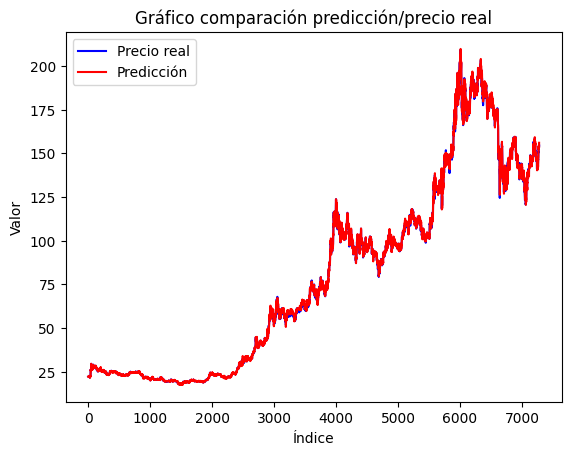

In [13]:
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predict, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [14]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - predict))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.8113275540694354
El error medio porcentualemente es: 0.9670508918721916


Probamos el algoritmo con los datos de test

In [15]:
Test1 = []
aux = df_test.iloc[0]
for r in range (0,df_test.shape[0] - 1):
    aux = df_test.iloc[r]
    Test1aux = []
    for i in range(1, aux.size):
        Test1aux.append(aux[i])
    Test1.append(Test1aux)
predictT = regr1.predict(Test1)
print(predictT)

C:\Users\raulg\AppData\Local\Temp\ipykernel_13000\886282011.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Test1aux.append(aux[i])


[154.31   153.732  154.3395 ... 142.393  142.6115 142.779 ]


In [16]:
Testrpr = []
for i in range(1,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)

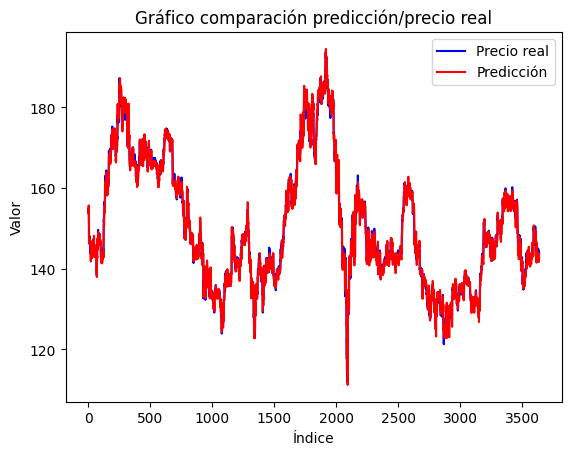

In [17]:
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predictT, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [18]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - predictT))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predictT[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.1719781473336992
El error medio porcentualemente es: 0.7826227595698083


# Predicción Utilizando XGBoost

In [19]:
df_xgb = df.copy()
df_xgb['close_next'] = df_xgb['close'].shift(-1)

In [20]:
df_xgb = df_xgb.dropna()
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36399 entries, 0 to 36398
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        36399 non-null  object 
 1   open        36399 non-null  float64
 2   high        36399 non-null  float64
 3   low         36399 non-null  float64
 4   close       36399 non-null  float64
 5   value       36399 non-null  int64  
 6   close_next  36399 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ MB


In [21]:
tamanio_xgb = df_xgb.shape[0]
tamanio_xgb

36399

In [22]:
df_train_xgb = df_xgb.copy().loc[0:int(tamanio_xgb*0.7)]
df_train_xgb

date   open   high    low  close  value  close_next
0      2020-08-12 03:00:00   3.10   3.35   3.10   3.25     75        3.15
1      2020-08-12 04:00:00   3.25   3.25   3.15   3.15     75        3.30
2      2020-08-12 05:00:00   3.15   3.30   3.15   3.30     75        3.30
3      2020-08-12 06:00:00   3.30   3.30   3.15   3.30     75        3.25
4      2020-08-12 07:00:00   3.25   3.25   3.20   3.25     75        3.25
...                    ...    ...    ...    ...    ...    ...         ...
25475  2023-07-11 20:00:00  22.10  22.10  21.95  22.00     57       22.00
25476  2023-07-11 21:00:00  22.00  22.05  21.90  22.00     57       22.00
25477  2023-07-11 22:00:00  22.00  22.10  21.90  22.00     57       21.95
25478  2023-07-11 23:00:00  22.00  22.05  21.75  21.95     57       22.05
25479  2023-07-12 00:00:00  21.95  22.10  21.90  22.05     64       22.10

[25480 rows x 7 columns]

In [23]:
df_vali_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.7 + 1):int(tamanio_xgb*0.9)]
df_vali_xgb

date    open    high     low   close  value  close_next
25480  2023-07-12 01:00:00   22.05   22.15   22.00   22.10     64       22.15
25481  2023-07-12 02:00:00   22.10   22.30   22.05   22.15     64       22.10
25482  2023-07-12 03:00:00   22.15   22.25   22.10   22.10     64       22.00
25483  2023-07-12 04:00:00   22.10   22.10   22.00   22.00     64       21.95
25484  2023-07-12 05:00:00   22.00   22.00   21.90   21.95     64       22.00
...                    ...     ...     ...     ...     ...    ...         ...
32755  2024-05-10 04:00:00  153.40  153.80  152.70  153.65     66      153.95
32756  2024-05-10 05:00:00  153.65  154.35  152.85  153.95     66      153.75
32757  2024-05-10 06:00:00  153.95  154.70  153.45  153.75     66      153.30
32758  2024-05-10 07:00:00  153.75  154.10  152.30  153.30     66      154.95
32759  2024-05-10 08:00:00  153.30  155.10  153.15  154.95     66      154.35

[7280 rows x 7 columns]

In [24]:
df_test_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.9 + 1):tamanio_xgb]
df_test_xgb

date    open    high     low   close  value  close_next
32760  2024-05-10 09:00:00  154.95  155.75  154.25  154.35     66      154.10
32761  2024-05-10 10:00:00  154.35  154.50  153.45  154.10     66      154.15
32762  2024-05-10 11:00:00  154.10  154.80  153.25  154.15     66      154.15
32763  2024-05-10 12:00:00  154.15  154.30  153.25  154.15     66      155.05
32764  2024-05-10 13:00:00  154.15  155.20  153.00  155.05     66      153.30
...                    ...     ...     ...     ...     ...    ...         ...
36394  2024-10-08 19:00:00  143.80  143.95  142.40  143.35     49      142.95
36395  2024-10-08 20:00:00  143.35  143.90  142.35  142.95     49      143.75
36396  2024-10-08 21:00:00  142.95  144.10  142.25  143.75     49      144.50
36397  2024-10-08 22:00:00  143.75  144.50  143.35  144.50     49      144.25
36398  2024-10-08 23:00:00  144.50  144.70  144.05  144.25     49      143.80

[3639 rows x 7 columns]

Definimos los datos y características del entrenamiento

In [25]:
X = df_train_xgb[['open', 'high', 'low', 'close']] 
y = df_train_xgb['close_next']
X1 = df_vali_xgb[['open', 'high', 'low', 'close']] 
y1 = df_vali_xgb['close_next']

In [26]:
dtrain = xgb.DMatrix(data=X, label=y)
dvali = xgb.DMatrix(data=X1, label=y1)

In [27]:
param = {'max_depth': 10, 'eta': 0.1, 'objective': 'reg:squarederror'}
evals = [(dtrain, 'train'), (dvali, 'validacion')]

Entrenamos el modelo XGBoost

In [28]:
bst = xgb.train(param, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10, verbose_eval=10)

[0]	train-rmse:52.03058	validacion-rmse:55.14741
[10]	train-rmse:18.24075	validacion-rmse:19.29663
[20]	train-rmse:6.47113	validacion-rmse:6.89713
[30]	train-rmse:2.49259	validacion-rmse:2.78981
[40]	train-rmse:1.33772	validacion-rmse:1.70668
[50]	train-rmse:1.09531	validacion-rmse:1.52521
[60]	train-rmse:1.05078	validacion-rmse:1.50811
[70]	train-rmse:1.03892	validacion-rmse:1.50938


Lo probamos con los datos de validación

In [29]:
predict_xgb = bst.predict(dvali)

In [30]:
Valirpr_xgb = []
for i in range(0,df_vali_xgb.shape[0]):
    Valirpr_xgb.append(df_vali_xgb.iloc[i].close)

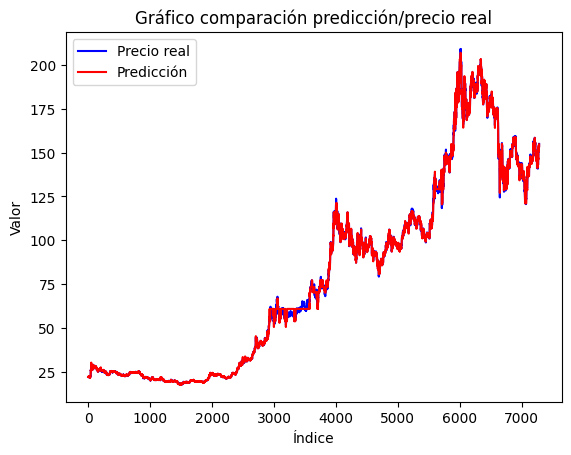

In [31]:
plt.plot(Valirpr_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [32]:
suma = 0
n = len(Valirpr_xgb)
mae = np.mean(np.abs(Valirpr_xgb - predict_xgb))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb[i] - Valirpr_xgb[i])/Valirpr_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.5122382410279995
El error medio porcentualemente es: 0.6814544222019102


Preparamos los datos de test en el formato necesario

In [33]:
df_test_xgb_aux = df_test_xgb.iloc[:-1].copy()
X_test = df_test_xgb_aux[['open', 'high', 'low', 'close']] 
y_test = df_test_xgb_aux['close_next']
dtest = xgb.DMatrix(data=X_test, label=y_test)

Lo probamos con los datos de test

In [34]:
predict_xgb_test = bst.predict(dtest)

In [35]:
Test_xgb = []
for i in range(1,df_test_xgb.shape[0]):
    Test_xgb.append(df_test_xgb.iloc[i].close)

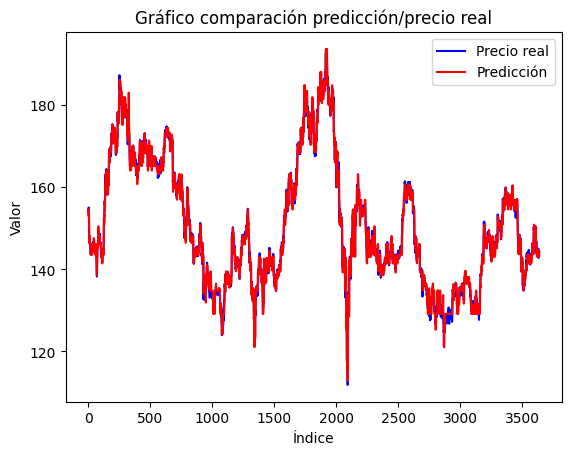

In [36]:
plt.plot(Test_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb_test, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [37]:
suma = 0
n = len(Test_xgb)
mae = np.mean(np.abs(Test_xgb - predict_xgb_test))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb_test[i] - Test_xgb[i])/Test_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.0809644047934774
El error medio porcentualemente es: 0.7275942239749614


# Entrenamos un modelo de red neuronal

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [39]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps, 3])  
    return np.array(X), np.array(y)
df_train_aux = df_train[['open', 'high', 'low', 'close', 'value']].values
X_train, y_train= create_sequences(df_train_aux, 7)
X_train

array([[[ 3.1 ,  3.35,  3.1 ,  3.25, 75.  ],
        [ 3.25,  3.25,  3.15,  3.15, 75.  ],
        [ 3.15,  3.3 ,  3.15,  3.3 , 75.  ],
        ...,
        [ 3.25,  3.25,  3.2 ,  3.25, 75.  ],
        [ 3.25,  3.3 ,  3.15,  3.25, 75.  ],
        [ 3.25,  3.4 ,  3.25,  3.4 , 75.  ]],

       [[ 3.25,  3.25,  3.15,  3.15, 75.  ],
        [ 3.15,  3.3 ,  3.15,  3.3 , 75.  ],
        [ 3.3 ,  3.3 ,  3.15,  3.3 , 75.  ],
        ...,
        [ 3.25,  3.3 ,  3.15,  3.25, 75.  ],
        [ 3.25,  3.4 ,  3.25,  3.4 , 75.  ],
        [ 3.35,  3.55,  3.35,  3.45, 75.  ]],

       [[ 3.15,  3.3 ,  3.15,  3.3 , 75.  ],
        [ 3.3 ,  3.3 ,  3.15,  3.3 , 75.  ],
        [ 3.25,  3.25,  3.2 ,  3.25, 75.  ],
        ...,
        [ 3.25,  3.4 ,  3.25,  3.4 , 75.  ],
        [ 3.35,  3.55,  3.35,  3.45, 75.  ],
        [ 3.45,  3.7 ,  3.4 ,  3.7 , 75.  ]],

       ...,

       [[22.1 , 22.4 , 21.95, 22.2 , 57.  ],
        [22.2 , 22.25, 21.9 , 22.15, 57.  ],
        [22.15, 22.2 , 21.95, 22.1 , 57.  

In [40]:
df_vali_aux = df_vali[['open', 'high', 'low', 'close', 'value']].values
X_vali, y_vali= create_sequences(df_vali_aux, 7)
X_vali

array([[[ 22.1 ,  22.3 ,  22.05,  22.15,  64.  ],
        [ 22.15,  22.25,  22.1 ,  22.1 ,  64.  ],
        [ 22.1 ,  22.1 ,  22.  ,  22.  ,  64.  ],
        ...,
        [ 21.95,  22.05,  21.9 ,  22.  ,  64.  ],
        [ 22.  ,  22.1 ,  22.  ,  22.05,  64.  ],
        [ 22.  ,  22.2 ,  22.  ,  22.05,  64.  ]],

       [[ 22.15,  22.25,  22.1 ,  22.1 ,  64.  ],
        [ 22.1 ,  22.1 ,  22.  ,  22.  ,  64.  ],
        [ 22.  ,  22.  ,  21.9 ,  21.95,  64.  ],
        ...,
        [ 22.  ,  22.1 ,  22.  ,  22.05,  64.  ],
        [ 22.  ,  22.2 ,  22.  ,  22.05,  64.  ],
        [ 22.05,  22.15,  22.  ,  22.05,  64.  ]],

       [[ 22.1 ,  22.1 ,  22.  ,  22.  ,  64.  ],
        [ 22.  ,  22.  ,  21.9 ,  21.95,  64.  ],
        [ 21.95,  22.05,  21.9 ,  22.  ,  64.  ],
        ...,
        [ 22.  ,  22.2 ,  22.  ,  22.05,  64.  ],
        [ 22.05,  22.15,  22.  ,  22.05,  64.  ],
        [ 22.05,  22.05,  21.95,  22.05,  64.  ]],

       ...,

       [[150.35, 153.4 , 150.15, 152.95,  

In [41]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(35,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mape')

C:\Users\raulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
X_trainR = []
for i in X_train:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_trainR.append(aux)       
X_trainR = np.array(X_trainR)  

In [43]:
X_valiR = []
for i in X_vali:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_valiR.append(aux)  
X_valiR = np.array(X_valiR)

In [44]:
history = model.fit(X_trainR, y_train, epochs=15, batch_size=96, validation_data=(X_valiR, y_vali), shuffle=False)

Epoch 1/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - loss: 66.7840 - val_loss: 23.9503
Epoch 2/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 71.2365 - val_loss: 8.4850
Epoch 3/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 29.6084 - val_loss: 1.8289
Epoch 4/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 35.4490 - val_loss: 4.5456
Epoch 5/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 32.0927 - val_loss: 1.3019
Epoch 6/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 20.9114 - val_loss: 11.3818
Epoch 7/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 20.2032 - val_loss: 7.3228
Epoch 8/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 14.4754 - val_loss: 1.9627
Epoch 9/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 20.8020 - val_loss: 1.7645
Epoch 10/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 29.9870 - val_loss: 2.9287
Epoch 11/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 18.8683 - val_loss: 4.3995
Epoch 12/15
266/2

In [45]:
y_pred = model.predict(X_valiR)
y_pred

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step


array([[ 22.59174 ],
       [ 22.597633],
       [ 22.61259 ],
       ...,
       [152.85197 ],
       [152.87129 ],
       [153.05992 ]], dtype=float32)

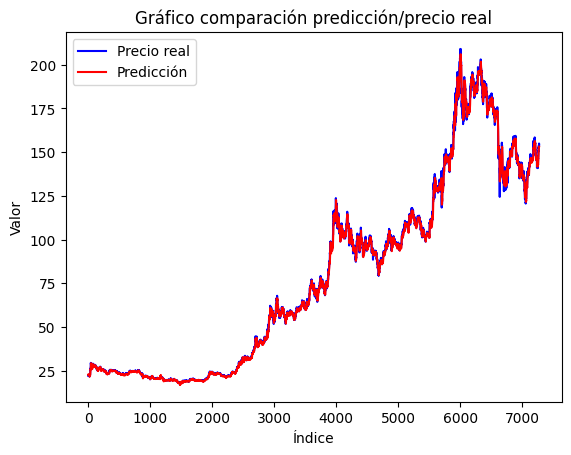

In [46]:
Valirpr = []
for i in range(7,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_pred, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [47]:
y_pred_aux=[]
for elem in y_pred:
    y_pred_aux.append(elem[0])
y_pred_aux = np.array(y_pred_aux)

In [48]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - y_pred_aux))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_aux[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.9525696806250061
El error medio porcentualemente es: 1.196430872302901


In [49]:
df_test_aux = df_test[['open', 'high', 'low', 'close', 'value']].values
X_test, y_test= create_sequences(df_test_aux, 7)
X_test

array([[[154.35, 154.5 , 153.45, 154.1 ,  66.  ],
        [154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        ...,
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ]],

       [[154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        ...,
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ]],

       [[154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        ...,
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ],
        [146.95, 148.8 , 145.15, 148.  ,  66.  ]],

       ...,

       [[143.3 , 145.1 , 142.7 , 145.05,  

In [50]:
X_testR = []
for i in X_test:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_testR.append(aux)       
X_testR = np.array(X_testR) 

In [51]:
y_predT = model.predict(X_testR)
y_predT

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


array([[151.58154],
       [149.95403],
       [148.96878],
       ...,
       [142.78096],
       [143.27014],
       [143.5259 ]], dtype=float32)

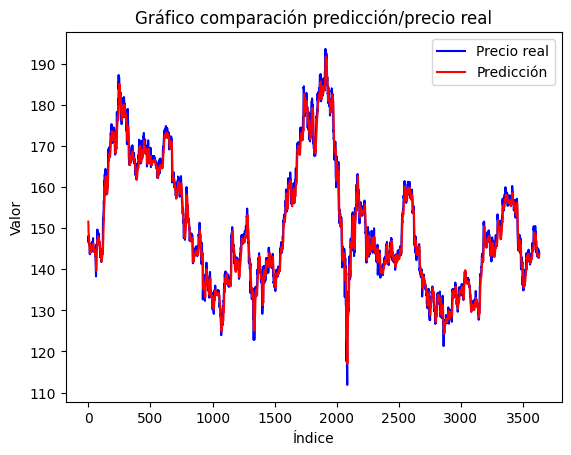

In [52]:
Testrpr = []
for i in range(7,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predT, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [53]:
y_pred_auxT=[]
for elem in y_predT:
    y_pred_auxT.append(elem[0])
y_pred_auxT = np.array(y_pred_auxT)

In [54]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - y_pred_auxT))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxT[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.3104907876069323
El error medio porcentualemente es: 0.8729176458679603


In [55]:
#model.save('mi_modelo_densoIMC3_96.h5')

In [56]:
def eval(Valirpr, y_pred_aux):
    suma = 0
    n = len(Valirpr)
    for i in range(0,n):
        suma = abs(y_pred_aux[i] - Valirpr[i])/Valirpr[i] +  suma
    error_medio = suma/n
    emp = error_medio*100 # error medio en porcentaje
    return emp

In [57]:
def rpr_prep(df):
    Testrpr = []
    for i in range(7,df.shape[0]):
        Testrpr.append(df.iloc[i].close)
    return Testrpr

In [58]:
def y_aux_prep(y_predT):
    y_pred_auxT=[]
    for elem in y_predT:
        y_pred_auxT.append(elem[0])
    y_pred_auxT = np.array(y_pred_auxT)
    return y_pred_auxT

In [59]:
def trainDenso(model, X_trainR, y_train, X_valiR, y_vali, X_testR):
    mejor_valor = 100.0
    epoc_list = [3, 5, 7, 10, 13, 16, 20, 24]
    batch_list = [4, 6, 8, 10, 12, 16, 20, 24, 28, 32, 36, 48, 56, 64, 80, 96, 112, 128, 140, 160, 180, 200, 228, 256]
    for e in epoc_list:
        for b in batch_list:
            for i in range(0, 50):
                history = model.fit(X_trainR, y_train, epochs=e, batch_size=b, validation_data=(X_valiR, y_vali), shuffle=False)
                y_pred = model.predict(X_testR)
                valor = eval(rpr_prep(df_test), y_aux_prep(y_pred))
                if valor < mejor_valor and valor < 1.0:
                    mejor_valor = valor
                    stri = "modelos_densos\mi_modelo_densoICM" + str(e) + "_" + str(b) + "_" + str(round(valor, 4)) + ".h5"
                    model.save(stri)

In [60]:
trainDenso(model, X_trainR, y_train, X_valiR, y_vali, X_testR)

Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 4s 591us/step - loss: 7.9023 - val_loss: 17.5374
Epoch 2/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 4s 588us/step - loss: 6.5724 - val_loss: 10.9514
Epoch 3/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 4s 607us/step - loss: 5.2334 - val_loss: 7.5764
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 4s 594us/step - loss: 4.7009 - val_loss: 6.9352
Epoch 2/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 4s 589us/step - loss: 4.2990 - val_loss: 6.7478
Epoch 3/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 4s 574us/step - loss: 3.8625 - val_loss: 5.9840
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 4s 589us/step - loss: 3.3160 - val_loss: 4.9735
Epoch 2/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 4s 565us/step - loss: 3.0922 - val_loss: 4.9533
Epoch 3/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 4s 574us/step - loss: 3.0371 - val_loss: 5.1080
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 4s 572us/step - loss: 2.891

Epoch 1/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - loss: 1.7770 - val_loss: 0.8616
Epoch 2/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - loss: 1.7319 - val_loss: 0.8511
Epoch 3/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - loss: 1.7381 - val_loss: 0.8916
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - loss: 1.7042 - val_loss: 0.8264
Epoch 2/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - loss: 1.6936 - val_loss: 0.8630
Epoch 3/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - loss: 1.6787 - val_loss: 0.8131
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


Epoch 1/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - loss: 1.6792 - val_loss: 0.8093
Epoch 2/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - loss: 1.6646 - val_loss: 0.8344
Epoch 3/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - loss: 1.6876 - val_loss: 0.8413
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - loss: 1.6892 - val_loss: 0.8732
Epoch 2/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - loss: 1.7030 - val_loss: 0.8970
Epoch 3/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - loss: 1.7935 - val_loss: 0.9415
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - loss: 1.8712 - val_loss: 0.8881
Epoch 2/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - loss: 1.9944 - val_loss: 0.9106
Epoch 3/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - loss: 1.9997 - val_loss: 0.9665
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - loss: 1.9883 

Epoch 1/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - loss: 1.5598 - val_loss: 0.7668
Epoch 2/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - loss: 1.5818 - val_loss: 0.7682
Epoch 3/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - loss: 1.5800 - val_loss: 0.7885
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


Epoch 1/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - loss: 1.5397 - val_loss: 0.7683
Epoch 2/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - loss: 1.5335 - val_loss: 0.7568
Epoch 3/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - loss: 1.5224 - val_loss: 0.7639
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - loss: 1.5316 - val_loss: 0.7710
Epoch 2/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - loss: 1.5319 - val_loss: 0.7568
Epoch 3/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - loss: 1.5303 - val_loss: 0.7679
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Epoch 1/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - loss: 1.5754 - val_loss: 0.7774
Epoch 2/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - loss: 1.6356 - val_loss: 0.7664
Epoch 3/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - loss: 1.5840 - val_loss: 0.7733
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - loss: 1.6002 - val_loss: 0.7615
E

Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 1.4719 - val_loss: 0.8518
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 1.5081 - val_loss: 0.8256
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - loss: 1.5054 - val_loss: 0.8449
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - loss: 1.5098 - val_loss: 0.8433
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - loss: 1.4999 - val_loss: 0.7653
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - loss: 1.4848 - val_loss: 0.8040
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - loss: 1.5055 - val_loss: 0.8543
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - loss: 1.4963 - val_loss: 0.8246
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - loss: 1.4997 - val_loss: 0.7541
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - loss: 1.4859 - val_loss: 0.8765
E

Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - loss: 1.5840 - val_loss: 0.8548
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - loss: 1.6567 - val_loss: 0.8308
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - loss: 1.4888 - val_loss: 0.8139
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - loss: 1.4671 - val_loss: 0.8278
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - loss: 1.4647 - val_loss: 0.8183
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - loss: 1.4483 - val_loss: 0.8170
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - loss: 1.4394 - val_loss: 0.8701
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - loss: 1.4486 - val_loss: 0.8020
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - loss: 1.4399 - val_loss: 0.8705
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - loss: 1.4835 - val_loss: 0.8313
E

Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - loss: 1.5170 - val_loss: 0.8620
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - loss: 1.6248 - val_loss: 0.8204
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - loss: 1.4833 - val_loss: 0.7551
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - loss: 1.4941 - val_loss: 0.8514
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 1.5666 - val_loss: 0.8163
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - loss: 1.4983 - val_loss: 0.8892
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - loss: 1.4966 - val_loss: 0.8657
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - loss: 1.4633 - val_loss: 0.8164
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 1.4571 - val_loss: 0.8607
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - loss: 1.4603 - val_loss: 0.7540
E

Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - loss: 1.4633 - val_loss: 0.8501
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - loss: 1.5072 - val_loss: 0.8776
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - loss: 1.4866 - val_loss: 0.8529
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - loss: 1.4782 - val_loss: 0.8105
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - loss: 1.4642 - val_loss: 0.8115
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - loss: 1.4650 - val_loss: 0.8206
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - loss: 1.4771 - val_loss: 0.7537
Epoch 2/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - loss: 1.4902 - val_loss: 0.8270
Epoch 3/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - loss: 1.5060 - val_loss: 0.8765
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - loss: 1.4838 - val_loss: 0.8276
E

Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 1.5120 - val_loss: 0.7457
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 1.4445 - val_loss: 0.7442
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1.4810 - val_loss: 0.7511
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.4442 - val_loss: 0.7435
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 1.5015 - val_loss: 0.7453
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1.4856 - val_loss: 0.7470
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 1.3901 - val_loss: 0.7442
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1.4151 - val_loss: 0.7459
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 1.4007 - val_loss: 0.7493
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1.3986 - val_loss: 0.7482
E

Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1.3996 - val_loss: 0.7431
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 1.3947 - val_loss: 0.7448
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 1.3949 - val_loss: 0.7445
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 1.4054 - val_loss: 0.7532
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1.3945 - val_loss: 0.7561
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 1.3945 - val_loss: 0.7649
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 1.3909 - val_loss: 0.7518
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 1.3980 - val_loss: 0.7676
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 1.4148 - val_loss: 0.8024
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 1.4394 - val_loss: 0.7668
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 1.4565 - val_loss: 0.8307
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 1.4613 - val_loss: 0.7784
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.4866 - val_loss: 0.7783
E

Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 1.4290 - val_loss: 0.7779
Epoch 2/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 1.4868 - val_loss: 0.7766
Epoch 3/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 1.4881 - val_loss: 0.7827
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 1.5246 - val_loss: 0.7660
Epoch 2/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 1.4612 - val_loss: 0.7699
Epoch 3/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1.5320 - val_loss: 0.7623
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 1.4670 - val_loss: 0.7694
Epoch 2/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 1.5277 - val_loss: 0.7767
Epoch 3/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 1.4851 - val_loss: 0.7831
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 1.5003 - val_loss: 0.7736
E

Epoch 1/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 1.5151 - val_loss: 0.7696
Epoch 2/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 1.6432 - val_loss: 0.7805
Epoch 3/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 1.8582 - val_loss: 0.7655
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
Epoch 1/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 1.5053 - val_loss: 0.7719
Epoch 2/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 1.6579 - val_loss: 0.7775
Epoch 3/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 1.7630 - val_loss: 0.7665
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
Epoch 1/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 1.6090 - val_loss: 0.7765
Epoch 2/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 1.8259 - val_loss: 0.7623
Epoch 3/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 1.5095 - val_loss: 0.7737
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
Epoch 1/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 1.7027 - val_loss: 0.7697
E

Epoch 1/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 1.5084 - val_loss: 0.7672
Epoch 2/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 1.6092 - val_loss: 0.7806
Epoch 3/3
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 1.8495 - val_loss: 0.7748
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 1.4801 - val_loss: 0.7776
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 1.4657 - val_loss: 0.7779
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 1.4957 - val_loss: 0.7661
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 1.5154 - val_loss: 0.7622
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 1.4990 - val_loss: 0.7677
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 1.5208 - val_loss: 0.7827
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 1.5149 - val_loss: 0.7798
E

Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 1.5206 - val_loss: 0.7836
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 1.5108 - val_loss: 0.7661
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 1.5102 - val_loss: 0.7690
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 1.5253 - val_loss: 0.7684
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 1.5014 - val_loss: 0.7783
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 1.5201 - val_loss: 0.7705
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 1.5131 - val_loss: 0.7669
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 1.5178 - val_loss: 0.7684
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1.5032 - val_loss: 0.7698
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 1.5384 - val_loss: 0.7613
E

Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 1.4317 - val_loss: 0.7605
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 1.6010 - val_loss: 0.7520
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 1.4389 - val_loss: 0.7638
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 1.6525 - val_loss: 0.7551
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 1.4366 - val_loss: 0.7612
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1.6153 - val_loss: 0.7543
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 1.4338 - val_loss: 0.7627
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1.6409 - val_loss: 0.7536
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1.4355 - val_loss: 0.7635
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 1.6494 - val_loss: 0.7518
E

Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 1.4246 - val_loss: 0.7597
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 1.5477 - val_loss: 0.7594
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 1.5604 - val_loss: 0.7571
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 1.4890 - val_loss: 0.7592
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1.5687 - val_loss: 0.7572
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.5027 - val_loss: 0.7646
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 1.6588 - val_loss: 0.7502
Epoch 2/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 1.4350 - val_loss: 0.7644
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 1.6583 - val_loss: 0.7533
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 1.4370 - val_loss: 0.7602
E

Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.5707 - val_loss: 0.7436
Epoch 2/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 1.5696 - val_loss: 0.7434
Epoch 3/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 1.5690 - val_loss: 0.7436
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 1.5682 - val_loss: 0.7433
Epoch 2/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 1.5673 - val_loss: 0.7432
Epoch 3/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 1.5680 - val_loss: 0.7440
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 1.5674 - val_loss: 0.7431
Epoch 2/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 1.5696 - val_loss: 0.7434
Epoch 3/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 1.5710 - val_loss: 0.7428
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 1.5688 - val_loss: 0.7431
E

Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 1.5667 - val_loss: 0.7430
Epoch 2/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 1.5673 - val_loss: 0.7428
Epoch 3/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 1.5660 - val_loss: 0.7427
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 1.5676 - val_loss: 0.7427
Epoch 2/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 1.5663 - val_loss: 0.7427
Epoch 3/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 1.5677 - val_loss: 0.7430
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 1.5677 - val_loss: 0.7427
Epoch 2/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 1.5686 - val_loss: 0.7429
Epoch 3/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 1.5687 - val_loss: 0.7428
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 1.5637 - val_loss: 0.7427
E

Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 1.5715 - val_loss: 0.7431
Epoch 2/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 1.5669 - val_loss: 0.7431
Epoch 3/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 1.5690 - val_loss: 0.7435
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 1.5723 - val_loss: 0.7435
Epoch 2/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 1.5713 - val_loss: 0.7428
Epoch 3/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 1.5700 - val_loss: 0.7427
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 1.5694 - val_loss: 0.7430
Epoch 2/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 1.5695 - val_loss: 0.7427
Epoch 3/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 1.5682 - val_loss: 0.7427
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 1.5681 - val_loss: 0.7426
E

Epoch 1/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.5394 - val_loss: 0.7496
Epoch 2/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 1.5365 - val_loss: 0.7474
Epoch 3/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 1.5356 - val_loss: 0.7443
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
Epoch 1/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 1.5385 - val_loss: 0.7482
Epoch 2/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 1.5345 - val_loss: 0.7440
Epoch 3/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 1.5351 - val_loss: 0.7444
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
Epoch 1/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.5373 - val_loss: 0.7476
Epoch 2/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 1.5360 - val_loss: 0.7449
Epoch 3/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 1.5368 - val_loss: 0.7450
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 1.5365 - val_loss: 0.7478
E

Epoch 1/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.5351 - val_loss: 0.7467
Epoch 2/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 1.5339 - val_loss: 0.7450
Epoch 3/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 1.5351 - val_loss: 0.7445
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 1.5341 - val_loss: 0.7471
Epoch 2/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 1.5320 - val_loss: 0.7450
Epoch 3/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 1.5346 - val_loss: 0.7446
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 1.5315 - val_loss: 0.7498
Epoch 2/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 1.5323 - val_loss: 0.7444
Epoch 3/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 1.5354 - val_loss: 0.7447
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Epoch 1/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.5322 - val_loss: 0.7445
E

Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - loss: 1.5373 - val_loss: 0.7953
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - loss: 1.5449 - val_loss: 0.7494
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 1.5237 - val_loss: 0.7789
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - loss: 1.5468 - val_loss: 0.7532
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - loss: 1.5455 - val_loss: 0.8056
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - loss: 1.5404 - val_loss: 0.7712
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 1.5139 - val_loss: 0.7518
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 1.5212 - val_loss: 0.7491
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - loss: 1.5256 - val_loss: 0.7913
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - loss: 1.5358 - val_loss: 0.7489
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 73

Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 1.5383 - val_loss: 0.7698
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - loss: 1.5204 - val_loss: 0.7725
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - loss: 1.5226 - val_loss: 0.7472
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - loss: 1.5172 - val_loss: 0.7504
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 1.5163 - val_loss: 0.7582
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - loss: 1.5193 - val_loss: 0.7490
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - loss: 1.5077 - val_loss: 0.7549
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 1.5212 - val_loss: 0.7482
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - loss: 1.5338 - val_loss: 0.7498
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - loss: 1.5319 - val_loss: 0.7625
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 75

Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - loss: 1.5187 - val_loss: 0.7518
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - loss: 1.5222 - val_loss: 0.7532
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - loss: 1.5559 - val_loss: 0.7584
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - loss: 1.5571 - val_loss: 0.7671
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 1.5463 - val_loss: 0.7516
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - loss: 1.5270 - val_loss: 0.7540
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - loss: 1.5113 - val_loss: 0.7496
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - loss: 1.5125 - val_loss: 0.7632
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 1.5503 - val_loss: 0.7466
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - loss: 1.5081 - val_loss: 0.7545
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 73

Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - loss: 1.5329 - val_loss: 0.7654
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - loss: 1.5319 - val_loss: 0.7546
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - loss: 1.5439 - val_loss: 0.7495
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - loss: 1.5344 - val_loss: 0.7611
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - loss: 1.5403 - val_loss: 0.7552
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - loss: 1.5217 - val_loss: 0.7699
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 1.5269 - val_loss: 0.7509
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 1.5412 - val_loss: 0.7615
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - loss: 1.5196 - val_loss: 0.7917
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 1.5386 - val_loss: 0.7491
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 75

Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - loss: 1.5613 - val_loss: 0.7524
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - loss: 1.5919 - val_loss: 0.7810
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - loss: 1.5689 - val_loss: 0.7500
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 1.5226 - val_loss: 0.7505
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - loss: 1.5265 - val_loss: 0.7485
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 1.5388 - val_loss: 0.7632
Epoch 2/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - loss: 1.5557 - val_loss: 0.7683
Epoch 3/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 1.5396 - val_loss: 0.7511
Epoch 4/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - loss: 1.5372 - val_loss: 0.7606
Epoch 5/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - loss: 1.5591 - val_loss: 0.7549
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
Epoch 1/5
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 72

Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 1.5239 - val_loss: 0.8679
Epoch 2/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - loss: 1.5027 - val_loss: 0.9645
Epoch 3/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - loss: 1.4753 - val_loss: 1.0322
Epoch 4/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - loss: 1.4482 - val_loss: 0.8077
Epoch 5/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - loss: 1.3866 - val_loss: 0.8565
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - loss: 1.4149 - val_loss: 0.9506
Epoch 2/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - loss: 1.4480 - val_loss: 0.9122
Epoch 3/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - loss: 1.4436 - val_loss: 0.8377
Epoch 4/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - loss: 1.4313 - val_loss: 1.0590
Epoch 5/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - loss: 1.4284 - val_loss: 0.8935
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 74

Epoch 1/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 1.6674 - val_loss: 0.7462
Epoch 2/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 1.6779 - val_loss: 0.7470
Epoch 3/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 1.6874 - val_loss: 0.7490
Epoch 4/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 1.6607 - val_loss: 0.7485
Epoch 5/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 1.7159 - val_loss: 0.7520
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
Epoch 1/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 1.6737 - val_loss: 0.7476
Epoch 2/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 1.6717 - val_loss: 0.7533
Epoch 3/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 1.7018 - val_loss: 0.7773
Epoch 4/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 1.7018 - val_loss: 0.7506
Epoch 5/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 1.6475 - val_loss: 0.7723
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
Epoch 1/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 87

Epoch 1/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 1.7029 - val_loss: 0.7751
Epoch 2/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 1.7044 - val_loss: 0.7502
Epoch 3/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 1.6466 - val_loss: 0.7765
Epoch 4/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 1.7214 - val_loss: 0.7492
Epoch 5/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 1.6559 - val_loss: 0.7496
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 1.7446 - val_loss: 0.7658
Epoch 2/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 1.6767 - val_loss: 0.7557
Epoch 3/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 1.5780 - val_loss: 0.7481
Epoch 4/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 1.4473 - val_loss: 0.7404
Epoch 5/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 1.4551 - val_loss: 0.7431
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 94

Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 1.3677 - val_loss: 0.7517
Epoch 2/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 1.3623 - val_loss: 0.7644
Epoch 3/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 1.3780 - val_loss: 0.7449
Epoch 4/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 1.3898 - val_loss: 0.7412
Epoch 5/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 1.3975 - val_loss: 0.7408
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step


Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 1.3893 - val_loss: 0.7447
Epoch 2/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 1.3869 - val_loss: 0.7432
Epoch 3/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 1.3808 - val_loss: 0.7478
Epoch 4/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 1.3994 - val_loss: 0.7475
Epoch 5/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 1.3884 - val_loss: 0.7449
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 1.3887 - val_loss: 0.7392
Epoch 2/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 1.3913 - val_loss: 0.7520
Epoch 3/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 1.3946 - val_loss: 0.7475
Epoch 4/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 1.3826 - val_loss: 0.7410
Epoch 5/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 1.3885 - val_loss: 0.7460
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step
Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 96

Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4177 - val_loss: 0.7474
Epoch 2/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 1.4030 - val_loss: 0.7397
Epoch 3/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 1.3806 - val_loss: 0.7466
Epoch 4/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 1.3877 - val_loss: 0.7483
Epoch 5/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 1.3894 - val_loss: 0.7496
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 1.3989 - val_loss: 0.7520
Epoch 2/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 1.3729 - val_loss: 0.7494
Epoch 3/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 1.3797 - val_loss: 0.7566
Epoch 4/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 1.3929 - val_loss: 0.7422
Epoch 5/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 1.3869 - val_loss: 0.7605
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 971u

Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 1.3923 - val_loss: 0.7548
Epoch 2/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 1.3790 - val_loss: 0.7455
Epoch 3/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 1.4034 - val_loss: 0.7448
Epoch 4/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 1.3681 - val_loss: 0.7703
Epoch 5/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 1.3752 - val_loss: 0.7469
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3570 - val_loss: 0.7474
Epoch 2/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 1.3903 - val_loss: 0.7506
Epoch 3/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 1.3709 - val_loss: 0.7510
Epoch 4/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3679 - val_loss: 0.7509
Epoch 5/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 1.3920 - val_loss: 0.7450
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4466 - val_loss: 0.7599
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 1.4264 - val_loss: 0.7574
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 1.5453 - val_loss: 0.7533
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 1.5600 - val_loss: 0.7541
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 1.4733 - val_loss: 0.7517
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 1.5141 - val_loss: 0.7511
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 1.4965 - val_loss: 0.7544
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 1.4975 - val_loss: 0.7536
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 1.5190 - val_loss: 0.7558
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 1.5445 - val_loss: 0.7442
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 944u

Epoch 1/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4263 - val_loss: 0.7736
Epoch 2/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7896 - val_loss: 0.7390
Epoch 3/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3617 - val_loss: 0.7440
Epoch 4/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3494 - val_loss: 0.7639
Epoch 5/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3608 - val_loss: 0.7570
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
Epoch 1/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3670 - val_loss: 0.7530
Epoch 2/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3787 - val_loss: 0.7607
Epoch 3/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3447 - val_loss: 0.7479
Epoch 4/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4926 - val_loss: 0.7659
Epoch 5/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7709 - val_loss: 0.7730
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
Epoch 1/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.389

Epoch 1/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3642 - val_loss: 0.7440
Epoch 2/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 1.3565 - val_loss: 0.7430
Epoch 3/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 1.3585 - val_loss: 0.7418
Epoch 4/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3511 - val_loss: 0.7411
Epoch 5/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3635 - val_loss: 0.7492
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
Epoch 1/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3439 - val_loss: 0.7453
Epoch 2/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.3777 - val_loss: 0.7499
Epoch 3/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 1.3380 - val_loss: 0.7486
Epoch 4/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 1.4807 - val_loss: 0.7450
Epoch 5/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 1.3664 - val_loss: 0.7426
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step
Epoch 1/5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

Epoch 1/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 1.4223 - val_loss: 0.7444
Epoch 2/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 1.4506 - val_loss: 0.7451
Epoch 3/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 1.5518 - val_loss: 0.7442
Epoch 4/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 1.5306 - val_loss: 0.7383
Epoch 5/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 1.4224 - val_loss: 0.7406
Epoch 6/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 1.3937 - val_loss: 0.7418
Epoch 7/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 1.5009 - val_loss: 0.7418
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1.4895 - val_loss: 0.7435
Epoch 2/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 1.4562 - val_loss: 0.7404
Epoch 3/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 1.3956 - val_loss: 0.7417
Epoch 4/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 1.4783 - val_loss: 0.7413


Epoch 1/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 1.4656 - val_loss: 0.7416
Epoch 2/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 1.4156 - val_loss: 0.7439
Epoch 3/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 1.4250 - val_loss: 0.7455
Epoch 4/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 1.3638 - val_loss: 0.7581
Epoch 5/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 1.3736 - val_loss: 0.7532
Epoch 6/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 1.3733 - val_loss: 0.7613
Epoch 7/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 1.3862 - val_loss: 0.7519
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 1.4351 - val_loss: 0.7424
Epoch 2/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 1.5003 - val_loss: 0.7452
Epoch 3/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 1.4846 - val_loss: 0.7421
Epoch 4/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 1.4727 - val_loss: 0.7432


Epoch 1/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 1.3768 - val_loss: 0.7444
Epoch 2/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 1.4325 - val_loss: 0.7482
Epoch 3/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 1.4993 - val_loss: 0.7447
Epoch 4/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 1.5127 - val_loss: 0.7485
Epoch 5/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 1.5049 - val_loss: 0.7443
Epoch 6/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 1.4915 - val_loss: 0.7477
Epoch 7/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 1.4797 - val_loss: 0.7431
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 1.4644 - val_loss: 0.7455
Epoch 2/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 1.4023 - val_loss: 0.7464
Epoch 3/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 1.5030 - val_loss: 0.7470
Epoch 4/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 1.4896 - val_loss: 0.7433


Epoch 1/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 1.5000 - val_loss: 0.7466
Epoch 2/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 1.6218 - val_loss: 0.7556
Epoch 3/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 1.4928 - val_loss: 0.7563
Epoch 4/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 1.5641 - val_loss: 0.7563
Epoch 5/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1.4679 - val_loss: 0.7587
Epoch 6/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 1.5080 - val_loss: 0.7599
Epoch 7/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1.4804 - val_loss: 0.7629
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 1.5100 - val_loss: 0.7666
Epoch 2/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 1.4653 - val_loss: 0.7571
Epoch 3/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1.5209 - val_loss: 0.7558
Epoch 4/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 1.4532 - val_loss: 0.7642


Epoch 1/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 1.5298 - val_loss: 0.7494
Epoch 2/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 1.6794 - val_loss: 0.7505
Epoch 3/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 1.5785 - val_loss: 0.7553
Epoch 4/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 1.4456 - val_loss: 0.7601
Epoch 5/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 1.5228 - val_loss: 0.7595
Epoch 6/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1.6392 - val_loss: 0.7520
Epoch 7/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 1.5514 - val_loss: 0.7559
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Epoch 1/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 1.4423 - val_loss: 0.7583
Epoch 2/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 1.4449 - val_loss: 0.7555
Epoch 3/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 1.4931 - val_loss: 0.7539
Epoch 4/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 1.4837 - val_loss: 0.7706


Epoch 1/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 1.4933 - val_loss: 0.7554
Epoch 2/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 1.5095 - val_loss: 0.7592
Epoch 3/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 1.5262 - val_loss: 0.7607
Epoch 4/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 1.6453 - val_loss: 0.7495
Epoch 5/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1.5375 - val_loss: 0.7539
Epoch 6/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 1.4945 - val_loss: 0.7483
Epoch 7/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1.5873 - val_loss: 0.7542
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Epoch 1/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 1.4452 - val_loss: 0.7601
Epoch 2/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 1.5071 - val_loss: 0.7543
Epoch 3/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 1.5083 - val_loss: 0.7489
Epoch 4/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 1.5946 - val_loss: 0.7577


Epoch 1/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 1.5157 - val_loss: 0.7594
Epoch 2/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1.5776 - val_loss: 0.7525
Epoch 3/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 1.4744 - val_loss: 0.7573
Epoch 4/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 1.5018 - val_loss: 0.7510
Epoch 5/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 1.5899 - val_loss: 0.7534
Epoch 6/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1.4531 - val_loss: 0.7548
Epoch 7/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 1.5132 - val_loss: 0.7521
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Epoch 1/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 1.6227 - val_loss: 0.7598
Epoch 2/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1.5682 - val_loss: 0.7542
Epoch 3/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 1.4496 - val_loss: 0.7577
Epoch 4/7
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 1.5217 - val_loss: 0.7464


Epoch 1/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 1.4498 - val_loss: 0.7425
Epoch 2/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 1.5469 - val_loss: 0.7716
Epoch 3/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 1.3446 - val_loss: 0.7748
Epoch 4/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 1.3477 - val_loss: 0.7449
Epoch 5/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 1.3522 - val_loss: 0.7549
Epoch 6/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 1.3583 - val_loss: 0.7489
Epoch 7/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 1.3505 - val_loss: 0.7382
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Epoch 1/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 1.4126 - val_loss: 0.7435
Epoch 2/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 1.3957 - val_loss: 0.7534
Epoch 3/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1.3910 - val_loss: 0.7571
Epoch 4/7
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 1.3850 - val_loss: 0.7473


Epoch 1/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 1.3753 - val_loss: 0.7463
Epoch 2/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1.4695 - val_loss: 0.7442
Epoch 3/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.3853 - val_loss: 0.7546
Epoch 4/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 1.6549 - val_loss: 0.7669
Epoch 5/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.3816 - val_loss: 0.7599
Epoch 6/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 1.3756 - val_loss: 0.7490
Epoch 7/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 1.4532 - val_loss: 0.7465
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Epoch 1/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 1.5476 - val_loss: 0.7612
Epoch 2/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1.3514 - val_loss: 0.7757
Epoch 3/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1.3488 - val_loss: 0.7809
Epoch 4/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 1.4144 - val_loss: 0.7475


Epoch 1/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 1.4864 - val_loss: 0.7818
Epoch 2/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1.3810 - val_loss: 0.7487
Epoch 3/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.4630 - val_loss: 0.7533
Epoch 4/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 1.4009 - val_loss: 0.7527
Epoch 5/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 1.6183 - val_loss: 0.7728
Epoch 6/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 1.5095 - val_loss: 0.7664
Epoch 7/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 1.7073 - val_loss: 0.7578
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Epoch 1/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 1.3645 - val_loss: 0.7528
Epoch 2/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 1.3823 - val_loss: 0.7538
Epoch 3/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 1.4835 - val_loss: 0.7587
Epoch 4/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.3746 - val_loss: 0.7643


Epoch 1/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 1.4046 - val_loss: 0.7481
Epoch 2/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 1.5104 - val_loss: 0.7638
Epoch 3/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 1.3766 - val_loss: 0.7465
Epoch 4/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 1.3986 - val_loss: 0.7612
Epoch 5/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.5835 - val_loss: 0.7867
Epoch 6/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 1.5127 - val_loss: 0.7593
Epoch 7/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 1.6973 - val_loss: 0.7483
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Epoch 1/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 1.3811 - val_loss: 0.7529
Epoch 2/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.4286 - val_loss: 0.7482
Epoch 3/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 1.3933 - val_loss: 0.7519
Epoch 4/7
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 1.6140 - val_loss: 0.7749


KeyboardInterrupt: 

# Entrenamos un modelo LSTM

In [60]:
from tensorflow.keras.layers import LSTM

In [61]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(64, activation='relu', input_shape=(7, 5)))
modelLSTM.add(Dense(1))

C:\Users\raulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
modelLSTM.compile(optimizer='adam', loss='mape')

In [63]:
historyLSTM = modelLSTM.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_vali, y_vali), shuffle=False)

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11.0310 - val_loss: 5.2498
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.2526 - val_loss: 3.6754
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.8084 - val_loss: 4.1937
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.2715 - val_loss: 5.1996
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.0023 - val_loss: 4.7456
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.2969 - val_loss: 2.2989
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.0531 - val_loss: 5.2862
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.9256 - val_loss: 5.6532
Epoch 9/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.3434 - val_loss: 6.2539
Epoch 10/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.4595 - val_loss: 3.0564


In [64]:
y_predLSTM = modelLSTM.predict(X_vali)
y_predLSTM

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 22.167841],
       [ 22.17166 ],
       [ 22.149292],
       ...,
       [148.19757 ],
       [147.32751 ],
       [149.51529 ]], dtype=float32)

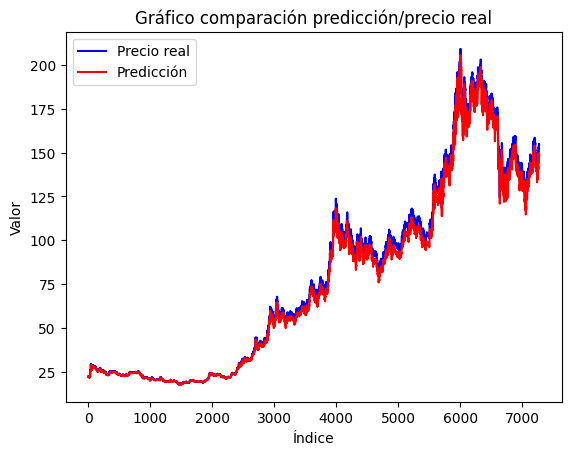

In [65]:
Valirpr = []
for i in range(7,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predLSTM, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [66]:
y_pred_auxLSTM=[]
for elem in y_predLSTM:
    y_pred_auxLSTM.append(elem[0])
y_pred_auxLSTM = np.array(y_pred_auxLSTM)

In [67]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - y_pred_auxLSTM))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxLSTM[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 3.0411879671795177
El error medio porcentualemente es: 3.0564422218392946


Probamos los datos de test

In [68]:
df_test_aux = df_test[['open', 'high', 'low', 'close', 'value']].values
X_test, y_test = create_sequences(df_test_aux, 7)
X_test

array([[[154.35, 154.5 , 153.45, 154.1 ,  66.  ],
        [154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        ...,
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ]],

       [[154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        ...,
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ]],

       [[154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        ...,
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ],
        [146.95, 148.8 , 145.15, 148.  ,  66.  ]],

       ...,

       [[143.3 , 145.1 , 142.7 , 145.05,  

In [69]:
y_predLSTMt = modelLSTM.predict(X_test)
y_predLSTMt

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step


array([[141.73935],
       [138.24713],
       [140.69339],
       ...,
       [138.29184],
       [139.25269],
       [138.8168 ]], dtype=float32)

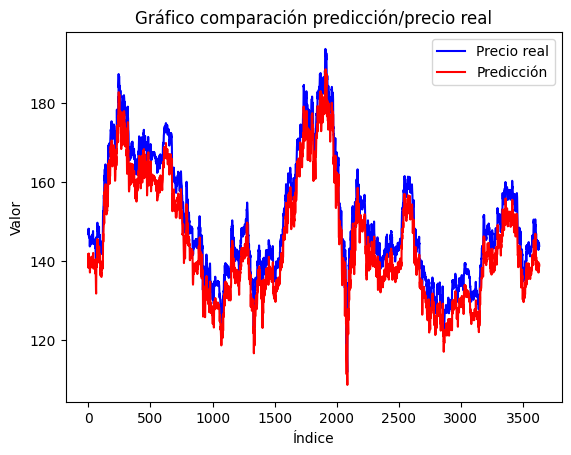

In [70]:
Testrpr = []
for i in range(7,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predLSTMt, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [71]:
y_pred_auxLSTM=[]
for elem in y_predLSTMt:
    y_pred_auxLSTM.append(elem[0])
y_pred_auxLSTM = np.array(y_pred_auxLSTM)

In [72]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - y_pred_auxLSTM))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxLSTM[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 5.666565995489448
El error medio porcentualemente es: 3.7825047684562567


In [73]:
#modelLSTM.save('mi_modelo_lstmICM10_32.h5')

In [74]:
def eval(Valirpr, y_pred_aux):
    suma = 0
    n = len(Valirpr)
    for i in range(0,n):
        suma = abs(y_pred_aux[i] - Valirpr[i])/Valirpr[i] +  suma
    error_medio = suma/n
    emp = error_medio*100 # error medio en porcentaje
    return emp

In [75]:
def rpr_prep(df):
    Testrpr = []
    for i in range(7,df.shape[0]):
        Testrpr.append(df.iloc[i].close)
    return Testrpr

In [76]:
def y_aux_prep(y_predLSTMt):
    y_pred_auxLSTM=[]
    for elem in y_predLSTMt:
        y_pred_auxLSTM.append(elem[0])
    y_pred_auxLSTM = np.array(y_pred_auxLSTM)
    return y_pred_auxLSTM

In [79]:
def trainLSTM(modelLSTM, X_train, y_train, X_vali, y_vali, X_test):
    epoc_list = [3, 5, 7, 10, 13, 16, 20, 24]
    batch_list = [4, 6, 8, 10, 12, 16, 20, 24, 28, 32, 36, 48, 56, 64, 80, 96, 112, 128, 140, 160, 180, 200, 228, 256]
    mejor_valor = 100.0
    for e in epoc_list:
        for b in batch_list:
            for i in range(0, 25):
                historyLSTM = modelLSTM.fit(X_train, y_train, epochs=e, batch_size=b, validation_data=(X_vali, y_vali), shuffle=False)
                y_predLSTM = modelLSTM.predict(X_test)
                valor = eval(rpr_prep(df_test), y_aux_prep(y_predLSTM))
                if valor < mejor_valor and valor < 1.0:
                    mejor_valor = valor
                    stri = "modelos_lstm\mi_modelo_lstmICM" + str(e) + "_" + str(b) + "_" + str(round(valor, 4)) + ".h5"
                    modelLSTM.save(stri)
                    
    
    
    
        
    

In [80]:
trainLSTM(modelLSTM, X_train, y_train, X_vali, y_vali, X_test)

Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.2453 - val_loss: 4.9477
Epoch 2/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.7259 - val_loss: 4.4435
Epoch 3/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.7099 - val_loss: 3.3490
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.3229 - val_loss: 3.5366
Epoch 2/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 2.7426 - val_loss: 3.0821
Epoch 3/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.8320 - val_loss: 3.0218
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.7206 - val_loss: 2.4756
Epoch 2/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.6063 - val_loss: 3.0037
Epoch 3/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.6801 - val_loss: 2.9658
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.9623 - val_loss: 2.8766
E

Epoch 1/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.1560 - val_loss: 2.6274
Epoch 2/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.9493 - val_loss: 3.0312
Epoch 3/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.9426 - val_loss: 3.0970
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
Epoch 1/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.9380 - val_loss: 3.2247
Epoch 2/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.9054 - val_loss: 3.3054
Epoch 3/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.9301 - val_loss: 3.2549
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
Epoch 1/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.0394 - val_loss: 2.0157
Epoch 2/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.9469 - val_loss: 2.7906
Epoch 3/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.8918 - val_loss: 3.2418
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
Epoch 1/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.0394 - val_loss: 3.3244
E

Epoch 1/3
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7734 - val_loss: 0.7962
Epoch 2/3
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7584 - val_loss: 0.8089
Epoch 3/3
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7475 - val_loss: 0.9659
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
Epoch 1/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7562 - val_loss: 1.0046
Epoch 2/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7782 - val_loss: 0.9976
Epoch 3/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8177 - val_loss: 1.0027
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
Epoch 1/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8347 - val_loss: 0.9769
Epoch 2/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8158 - val_loss: 1.0630
Epoch 3/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7749 - val_loss: 1.0021
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
Epoch 1/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8488 - val_loss: 1.0209
E

Epoch 1/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5981 - val_loss: 0.8445
Epoch 2/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6105 - val_loss: 0.8468
Epoch 3/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5958 - val_loss: 0.8383
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
Epoch 1/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6716 - val_loss: 0.8332
Epoch 2/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5364 - val_loss: 0.8530
Epoch 3/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6693 - val_loss: 0.8527
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
Epoch 1/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6591 - val_loss: 0.8470
Epoch 2/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6980 - val_loss: 0.8493
Epoch 3/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6341 - val_loss: 0.8500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
Epoch 1/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6818 - val_loss: 0.8525
Epoch 2/3
490/490 ━━━

Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7679 - val_loss: 0.8376
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7386 - val_loss: 0.8173
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6305 - val_loss: 0.8377
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6659 - val_loss: 0.8359
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6359 - val_loss: 0.8186
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5818 - val_loss: 0.8086
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5323 - val_loss: 0.8034
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4914 - val_loss: 0.8001
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6250 - val_loss: 0.8041
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5077 - val_loss: 0.8119
Epoch 2/3
455/455 ━━━

Epoch 1/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5274 - val_loss: 0.8020
Epoch 2/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4373 - val_loss: 0.8076
Epoch 3/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5240 - val_loss: 0.8070
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
Epoch 1/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5104 - val_loss: 0.8004
Epoch 2/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5119 - val_loss: 0.8024
Epoch 3/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4722 - val_loss: 0.8012
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
Epoch 1/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4744 - val_loss: 0.8005
Epoch 2/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4471 - val_loss: 0.8048
Epoch 3/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5734 - val_loss: 0.8041
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
Epoch 1/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4735 - val_loss: 0.8039
Epoch 2/3
432/432 ━━━

Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4770 - val_loss: 0.8112
Epoch 2/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6127 - val_loss: 0.8015
Epoch 3/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4788 - val_loss: 0.8342
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6753 - val_loss: 0.8090
Epoch 2/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4607 - val_loss: 0.8320
Epoch 3/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4941 - val_loss: 2.3085
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9567 - val_loss: 0.9486
Epoch 2/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4095 - val_loss: 0.8109
Epoch 3/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0413 - val_loss: 0.8681
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9044 - val_loss: 0.9293
Epoch 2/3
399/399 ━━━

Epoch 1/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3872 - val_loss: 0.7782
Epoch 2/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4404 - val_loss: 0.7690
Epoch 3/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4106 - val_loss: 0.7669
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
Epoch 1/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4781 - val_loss: 0.7647
Epoch 2/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4432 - val_loss: 0.7668
Epoch 3/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4588 - val_loss: 0.7721
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
Epoch 1/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4530 - val_loss: 0.7702
Epoch 2/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4635 - val_loss: 0.7767
Epoch 3/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4329 - val_loss: 0.7782
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step
Epoch 1/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4910 - val_loss: 0.7698
Epoch 2/3
392/392 ━━━

Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3840 - val_loss: 0.7502
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3956 - val_loss: 0.7504
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5197 - val_loss: 0.7513
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4727 - val_loss: 0.7575
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4077 - val_loss: 0.7623
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4051 - val_loss: 0.7551
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3808 - val_loss: 0.7515
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3872 - val_loss: 0.7530
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3703 - val_loss: 0.7540
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4082 - val_loss: 0.7524
Epoch 2/3
327/327 ━━━

Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4233 - val_loss: 0.7586
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4103 - val_loss: 0.7572
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4185 - val_loss: 0.7533
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4411 - val_loss: 0.7756
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4573 - val_loss: 0.7623
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4194 - val_loss: 0.7574
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3814 - val_loss: 0.7541
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3948 - val_loss: 0.7541
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4292 - val_loss: 0.7539
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
Epoch 1/3
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4895 - val_loss: 0.7926
Epoch 2/3
323/323 ━━━

KeyboardInterrupt: 